In [14]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from math import sqrt
from SGD import MySGDRegression
from BGD import MyBGDRegression

In [15]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

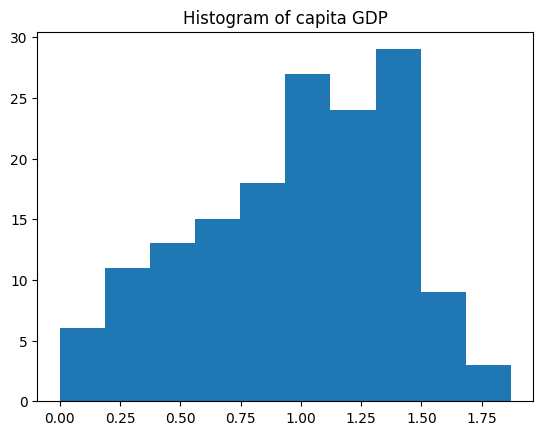

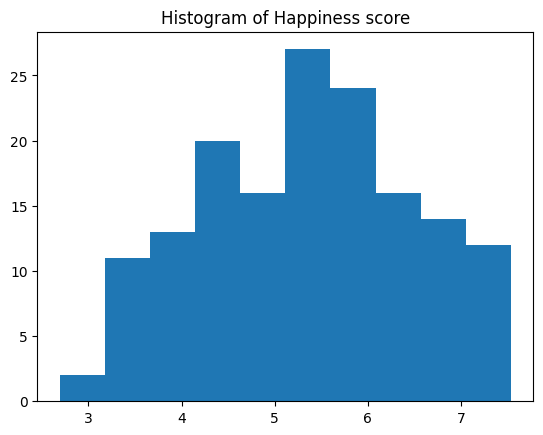

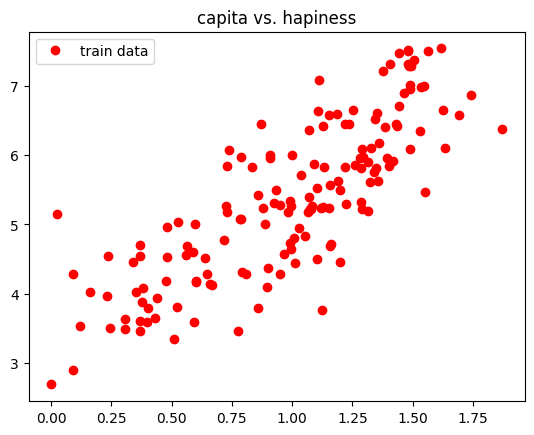

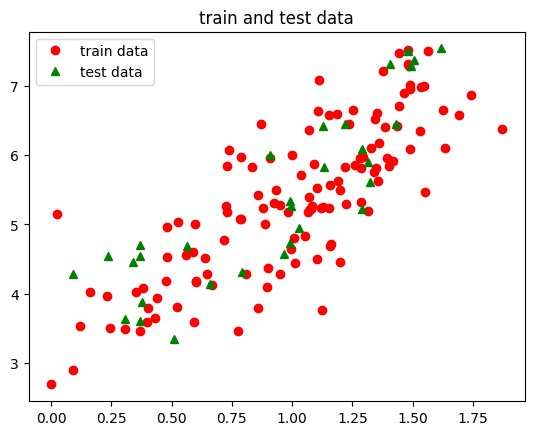

the learnt model: f(x) =  3.1994285956915123  +  2.1487678365481915 *x


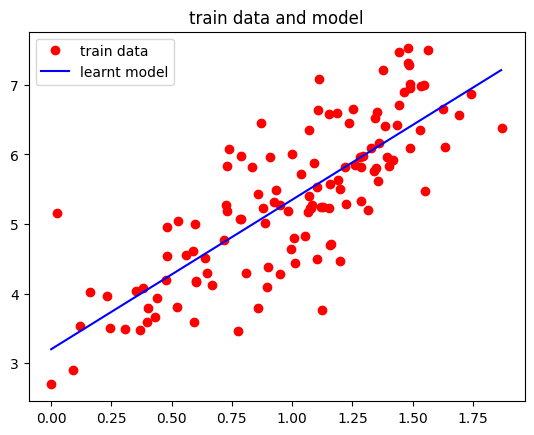

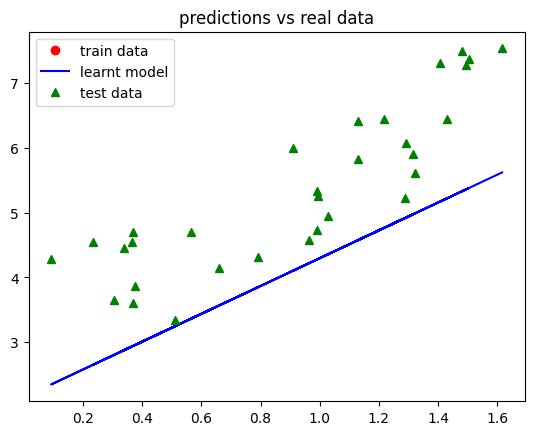

prediction error (manual):  1.9008773201208433
prediction error (tool):  1.9008773201208433


In [16]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data','world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = [i for i in indexes if not i in trainSample]
trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

xx = [[el] for el in trainInputs]
model="stocastic"
if(model == "stocastic"):
    regressor = MySGDRegression()
else:
    regressor=MyBGDRegression()

regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ',w0,' + ',w1,'*x')

noOfPoints=1000
xref=[]
val=min(trainInputs)
step=(max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1*el for el in xref]
plotData(trainInputs, trainOutputs, xref, yref, [], [], title="train data and model")

computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real data")

error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)



In [17]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    def remove_negative_values(feature1, feature2, outputs):
        new_feature1 = []
        new_feature2 = []
        new_outputs = []
        for f1, f2, out in zip(feature1, feature2, outputs):
            if f1 >= 0 and f2 >= 0 and out >= 0:
                new_feature1.append(f1)
                new_feature2.append(f2)
                new_outputs.append(out)
        return new_feature1, new_feature2, new_outputs

    x1Train, x2Train, yTrain = remove_negative_values(x1Train, x2Train, yTrain)
    if x1Test is not None and x2Test is not None and yTest is not None:
        x1Test, x2Test, yTest = remove_negative_values(x1Test, x2Test, yTest)

    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data')
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model')
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()


def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData) 
        normalisedTrainData = scaler.transform(trainData) 
        normalisedTestData = scaler.transform(testData)

        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  
        normalisedTrainData = scaler.transform(trainData) 
        normalisedTestData = scaler.transform(testData)  
    return normalisedTrainData, normalisedTestData

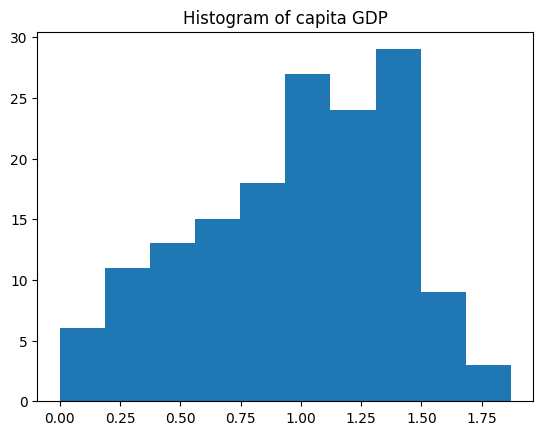

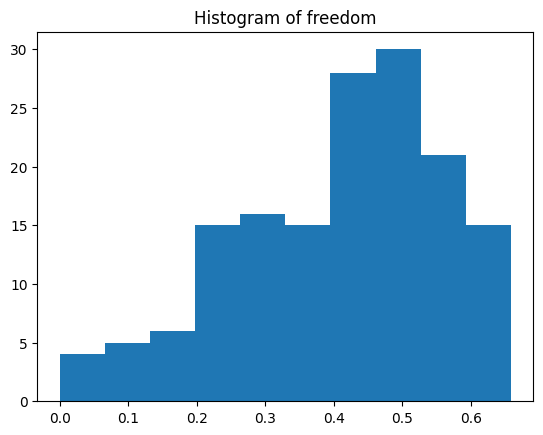

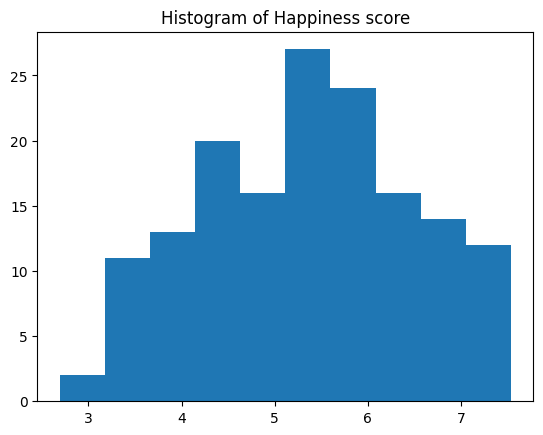

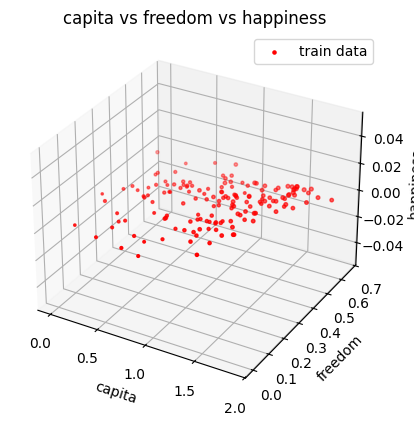

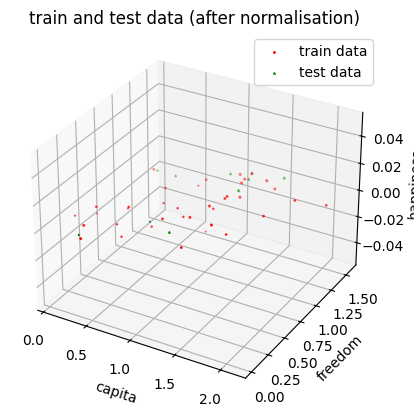

the learnt model: f(x) =  -0.0011659051562902811  +  0.6979590980445686 *x1 +  0.3039745892925814 *x2


/Users/horatiubanciu/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


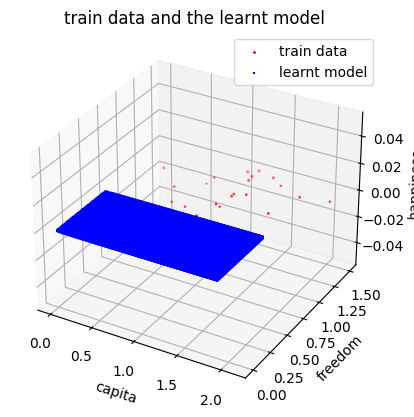

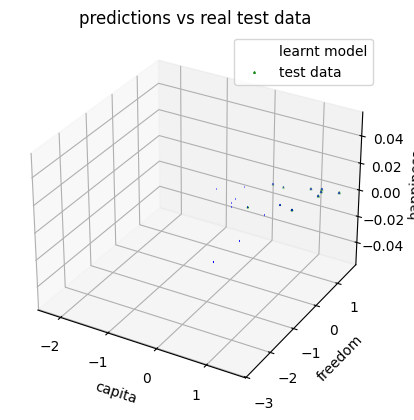

prediction error (manual):  0.23322521427524043
prediction error (tool):    0.2332252142752404


In [18]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')


np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs,"train and test data (after normalisation)")


if(model == "batch"):
    regressor = MySGDRegression()
else:
    regressor = MyBGDRegression()

regressor.fit(trainInputs, trainOutputs)

w0,w1,w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ',w0,' + ',w1,'*x1 + ',w2,'*x2')

noOfPoints = 1000
xref1=[]
val=min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1,noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2=[]
val=min(feature2)
step2=(max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux=val
    for _ in range(1,noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [],'train data and the learnt model')

computedTestOutputs = regressor.predict(testInputs)

plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs,'predictions vs real test data')


error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

In [19]:
def plotROCCurve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
def loadDataMoreInputs2(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [1 if data[i][selectedOutput] == 'M' else 0 for i in range(len(data))]

    return inputs, outputs

In [21]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'wdbc.csv')

inputs, outputs = loadDataMoreInputs2(filePath, ['Radius', 'Texture'], 'Diagnosis')

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

scaler = StandardScaler()
if not isinstance(trainInputs[0], list):
    trainInputs = [[d] for d in trainInputs]
    testInputs = [[d] for d in testInputs]

    scaler.fit(trainInputs)
    trainInputs = scaler.transform(trainInputs)
    testInputs = scaler.transform(testInputs)

    trainInputs = [el[0] for el in trainInputs]
    testInputs = [el[0] for el in testInputs]
else:
    scaler.fit(trainInputs)
    trainInputs = scaler.transform(trainInputs)
    testInputs = scaler.transform(testInputs)

model = LogisticRegression()
model.fit(trainInputs, trainOutputs)
w0, w1 = model.intercept_, model.coef_[0]
print('the learnt model: f(x) = ', w0[0], ' + ', w1[0], ' * x1 + ', w1[1], ' * x2')



computedTestOutputs = model.predict(testInputs)

print('Accuracy: ',accuracy_score(testOutputs, computedTestOutputs))
print('Precision: ', precision_score(testOutputs, computedTestOutputs))
print('Recall: ', recall_score(testOutputs, computedTestOutputs))

normalized_inputs = scaler.transform([[18,20]])
prediction = model.predict(np.array(normalized_inputs))
if prediction[0] == 0:
    print("The lesion is predicted to be benign")
else:
    print("The lesion is predicted to be malignant")

the learnt model: f(x) =  -0.9122440356107672  +  3.714265538441941  * x1 +  0.9215248354552283  * x2
Accuracy:  0.7982456140350878
Precision:  0.8461538461538461
Recall:  0.66
The lesion is predicted to be malignant


In [25]:
def loadDataMoreInputs3(fileName, inputVariabNames, outputVariabName, label_encoder):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(var) for var in inputVariabNames]
    inputs = [[float(data[i][var]) for var in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [data[i][selectedOutput] for i in range(len(data))]

    outputs_encoded = label_encoder.fit_transform(outputs)

    outputs_encoded = outputs_encoded.reshape(-1, 1)

    return inputs, outputs_encoded

In [ ]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'iris.csv')

label_encoder = LabelEncoder()
inputs, outputs = loadDataMoreInputs3(filePath, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], 'Class', label_encoder)

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


scaler = StandardScaler()
scaler.fit(trainInputs)
trainInputs = scaler.transform(trainInputs)
testInputs = scaler.transform(testInputs)

from logistic_regression_pb3 import MyLogisticRegression
mode='x'
if mode == 'tool':
    model=LogisticRegression()
    model.fit(trainInputs, trainOutputs)
    w0, w1 = model.intercept_, model.coef_[0]
    print('the learnt model: f(x) = ',w0[0],' + ',w1[0],'*x1 + ',w1[1],'*x2')
else:
    model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000, threshold=0.33)
    model.fit(trainInputs, trainOutputs)
    learned_coefficients = model.theta
    print('the learnt model: f(x) = ', learned_coefficients[0][0], ' + ', learned_coefficients[1][0], ' * x1 + ',learned_coefficients[2][0], ' * x2')

computedTestOutputs = model.predict(testInputs)

print('Accuracy: ', accuracy_score(testOutputs, computedTestOutputs))
print('Precision: ', precision_score(testOutputs, computedTestOutputs, average='weighted'))
print('Recall: ', recall_score(testOutputs, computedTestOutputs, average='weighted'))

normalized_inputs = scaler.transform([[5.35, 3.85, 1.25, 0.4]])
prediction = model.predict(np.array(normalized_inputs))
predicted_species = label_encoder.inverse_transform(prediction)
print("The predicted species for the flower is: ", predicted_species[0])




the learnt model: f(x) =  -0.10971986973912866  +  -0.9687222535134726 *x1 +  1.2160841674416778 *x2
Accuracy:  0.9666666666666667
Precision:  0.9708333333333333
Recall:  0.9666666666666667
The predicted species for the flower is:  Iris-setosa


/Users/horatiubanciu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
